# Home Advantage in Football Matches

### Goal:
Analyze the dataset to determine if there is a measurable advantage for teams playing at home across different leagues and seasons. 
We'll explore trends across leagues and seasons, using data from the Kaggle Soccer dataset.


In [12]:
import kagglehub
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Download the dataset
path = kagglehub.dataset_download("hugomathien/soccer")

# Step 2: Construct the path to the SQLite database
db_file = os.path.join(path, "database.sqlite")

# Step 3: Connect to the SQLite database
try:
    conn = sqlite3.connect(db_file)
except sqlite3.OperationalError as e:
    print(f"Error: {e}")
    exit()

In [7]:
query = """
SELECT 
    home_team_goal, 
    away_team_goal, 
    league_id, 
    season, 
    home_team_api_id, 
    away_team_api_id
FROM Match
"""
matches = pd.read_sql(query, conn)
print(matches.head())

   home_team_goal  away_team_goal  league_id     season  home_team_api_id  \
0               1               1          1  2008/2009              9987   
1               0               0          1  2008/2009             10000   
2               0               3          1  2008/2009              9984   
3               5               0          1  2008/2009              9991   
4               1               3          1  2008/2009              7947   

   away_team_api_id  
0              9993  
1              9994  
2              8635  
3              9998  
4              9985  


# Exploratory Data Analysis (EDA)
This section focuses on understanding key patterns and distributions within the dataset. The goal of the EDA is to uncover insights into match outcomes, scoring trends, and team performances. By visualizing and summarizing the data, we aim to answer the following questions:

1. **Goal Distribution**:
   - How are goals distributed for home and away teams?
   - Is there a noticeable difference between home and away performances?

2. **Match Outcomes**:
   - What percentage of matches result in home wins, draws, and losses?
   - Is there evidence of a home-field advantage?

3. **Comparisons and Trends**:
   - How do home and away team goals compare side by side?
   - Are there correlations or patterns that might indicate influencing factors?

Through visualizations (e.g., histograms, count plots) and statistical summaries, this section will provide an in-depth look into the dataset’s structure and key characteristics. These findings will form the foundation for more advanced analysis in subsequent sections.

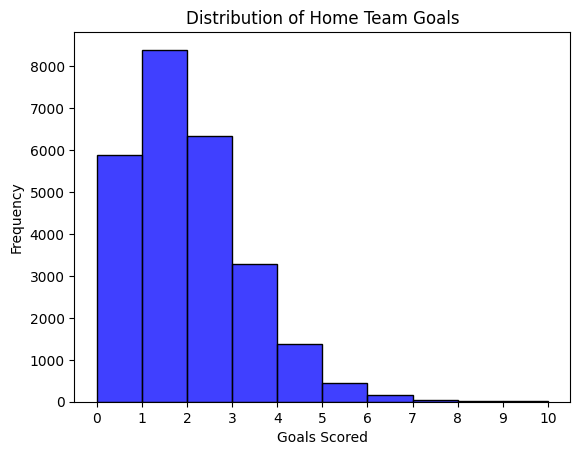

In [18]:
queryHomeGoals = """
SELECT home_team_goal 
FROM Match
"""
home_goals = pd.read_sql(queryHomeGoals, conn)
sns.histplot(home_goals['home_team_goal'], color="blue", bins=10)
plt.xticks(range(0, 11, 1))
plt.title("Distribution of Home Team Goals")
plt.xlabel("Goals Scored")
plt.ylabel("Frequency")
plt.show()

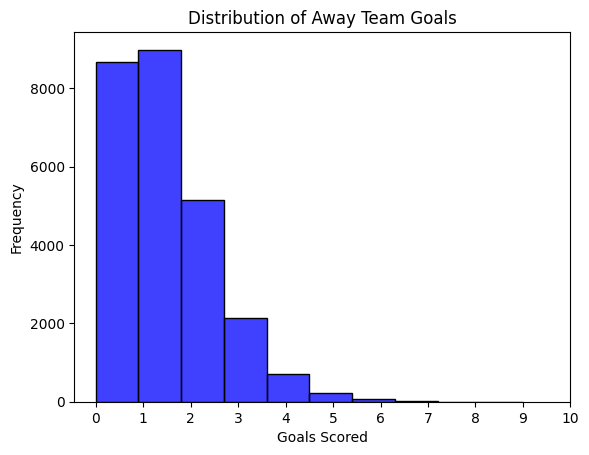

In [20]:
queryAwayGoals = """
SELECT away_team_goal 
FROM Match
"""
away_goals = pd.read_sql(queryAwayGoals, conn)
sns.histplot(away_goals['away_team_goal'], color="blue", bins=10)
plt.xticks(range(0, 11, 1))
plt.title("Distribution of Away Team Goals")
plt.xlabel("Goals Scored")
plt.ylabel("Frequency")
plt.show()


Average Home Goals: 1.5445937103044767
Average Away Goals: 1.1609376804341969

Match Outcome Percentages:
result
Win     45.871666
Loss    28.738597
Draw    25.389738
Name: proportion, dtype: float64


C:\Users\damia\AppData\Local\Temp\ipykernel_4388\920892311.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=matches, x='result', order=['Win', 'Draw', 'Loss'], palette=custom_palette)


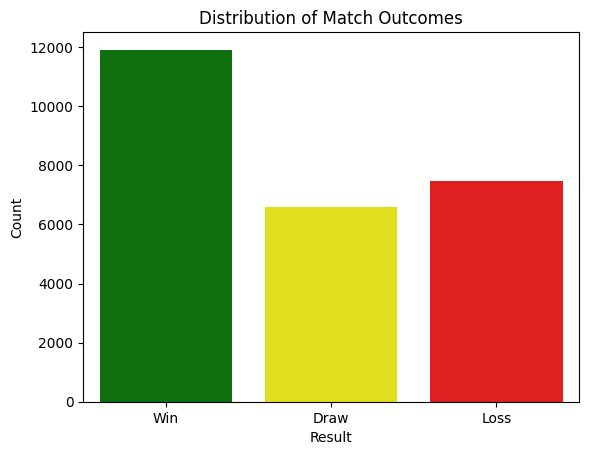

In [15]:
home_avg_goals = matches['home_team_goal'].mean()
away_avg_goals = matches['away_team_goal'].mean()
print(f"\nAverage Home Goals: {home_avg_goals}")
print(f"Average Away Goals: {away_avg_goals}")
matches['result'] = matches.apply(
    lambda row: 'Win' if row['home_team_goal'] > row['away_team_goal']
    else 'Loss' if row['home_team_goal'] < row['away_team_goal']
    else 'Draw', axis=1
)
result_counts = matches['result'].value_counts(normalize=True) * 100
print("\nMatch Outcome Percentages:")
print(result_counts)
custom_palette = {
    "Win": "green",
    "Draw": "yellow",
    "Loss": "red"
}
sns.countplot(data=matches, x='result', order=['Win', 'Draw', 'Loss'], palette=custom_palette)
plt.title("Distribution of Home Match Outcomes")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()